We are trying to identify what can be done about missing data. 
Now we will look at rows with too many missing fields.
We start with counting the missing fields per row.

In [2]:
import pandas as pd

# Load the cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing (NaN) values per row
df['missing_count'] = df.isna().sum(axis=1)

# Display first few rows with missing count
print(df[['id', 'missing_count']].head(10))

# Optionally show summary statistics
print("\nSummary of missing values per row:")
print(df['missing_count'].describe())

# If you want to see how many rows have more than, e.g., 10 missing fields:
num_sparse_rows = (df['missing_count'] > 10).sum()
print(f"\nRows with more than 10 missing fields: {num_sparse_rows}")


         id  missing_count
0  34221000              2
1   2104000              3
2  34036000              4
3  58496000              4
4  48727000              4
5  22183000              7
6  13232000              6
7  48707000              4
8  74290000              5
9  58028000              3

Summary of missing values per row:
count    75504.000000
mean         3.325387
std          2.114067
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         12.000000
Name: missing_count, dtype: float64

Rows with more than 10 missing fields: 2


Find the rows with the highest number of missing fields.
List exactly which columns are missing in those rows.

In [3]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing (NaN) values per row
df['missing_count'] = df.isna().sum(axis=1)

# Show basic stats
print("Summary of missing values per row:")
print(df['missing_count'].describe())

# Find the maximum number of missing fields
max_missing = df['missing_count'].max()
print(f"\nHighest number of missing fields in a row: {max_missing}")

# Get all rows that have this maximum number
most_missing_rows = df[df['missing_count'] == max_missing]

print(f"\nNumber of rows with {max_missing} missing fields: {len(most_missing_rows)}")

# Show which columns are missing for these rows
for idx, row in most_missing_rows.iterrows():
    missing_cols = row[row.isna()].index.tolist()
    print(f"\nRow index {idx}, ID: {row.get('id', 'N/A')}")
    print("Missing columns:", missing_cols)

# Optionally, display first few for inspection
display(most_missing_rows.head())

df[df["id"] == 16170000]


Summary of missing values per row:
count    75504.000000
mean         3.325387
std          2.114067
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         12.000000
Name: missing_count, dtype: float64

Highest number of missing fields in a row: 12

Number of rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income']

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income']


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
11790,16170000,5990000,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1420,50.674914,4.393347,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,6
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


In [4]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get highest and second-highest missing counts
sorted_counts = df['missing_count'].sort_values(ascending=False).unique()
max_missing = sorted_counts[0]
second_max_missing = sorted_counts[1] if len(sorted_counts) > 1 else None

print(f"Highest missing count: {max_missing}")
print(f"Second highest missing count: {second_max_missing}\n")

# Function to display rows and missing columns
def display_missing_rows(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    for idx, row in rows.iterrows():
        missing_cols = row[row.isna()].index.tolist()
        print(f"Row index {idx}, ID: {row.get('id', 'N/A')}")
        print("Missing columns:", missing_cols, "\n")
    display(rows)

# Display highest missing rows
display_missing_rows(df, max_missing)

# Display second-highest missing rows if they exist
if second_max_missing is not None:
    display_missing_rows(df, second_max_missing)



Highest missing count: 12
Second highest missing count: 10

Rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Row index 10383, ID: 26276000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'equipped_kitchen', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


In [5]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:3]  # top 3

print("Top missing counts:", top_counts, "\n")

# Function to display rows and missing columns
def display_missing_rows(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    for idx, row in rows.iterrows():
        missing_cols = row[row.isna()].index.tolist()
        print(f"Row index {idx}, ID: {row.get('id', 'N/A')}")
        print("Missing columns:", missing_cols, "\n")
    display(rows)

# Loop over top counts and display
for count in top_counts:
    display_missing_rows(df, count)



Top missing counts: [12 10  9] 

Rows with 12 missing fields: 2

Row index 52162, ID: 16170000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 63124, ID: 47220000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Row index 10383, ID: 26276000
Missing columns: ['region', 'province', 'locality', 'latitude', 'longitude', 'equipped_kitchen', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 



,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


Rows with 9 missing fields: 277

Row index 70, ID: 30123000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 108, ID: 24067000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 132, ID: 4073000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 136, ID: 40186000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'cadastral_income'] 

Row index 746, ID: 75303000
Missing columns: ['latitude', 'longitude', 'surface_land_sqm', 'equipped_kitchen', 'state_building', 'primary

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9


In [6]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending, top 4
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:4]
print("Top 4 missing counts:", top_counts, "\n")

# Function to display rows and commonly missing columns
def display_missing_info(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    
    # Compute commonly missing columns across these rows
    missing_cols = rows.isna().sum().sort_values(ascending=False)
    commonly_missing = missing_cols[missing_cols > 0]
    
    print("Most commonly missing columns in these rows:")
    display(commonly_missing)
    
    # Display the actual rows for inspection
    display(rows)

# Loop over top_counts and display info
for count in top_counts:
    display_missing_info(df, count)


Top 4 missing counts: [12 10  9  8] 

Rows with 12 missing fields: 2

Most commonly missing columns in these rows:


locality                          2
province                          2
region                            2
longitude                         2
surface_land_sqm                  2
latitude                          2
equipped_kitchen                  2
cadastral_income                  2
primary_energy_consumption_sqm    2
state_building                    2
heating_type                      2
epc                               2
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Most commonly missing columns in these rows:


locality                          1
province                          1
region                            1
longitude                         1
latitude                          1
cadastral_income                  1
equipped_kitchen                  1
epc                               1
primary_energy_consumption_sqm    1
heating_type                      1
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


Rows with 9 missing fields: 277

Most commonly missing columns in these rows:


surface_land_sqm                  277
longitude                         277
latitude                          277
cadastral_income                  277
primary_energy_consumption_sqm    277
epc                               277
equipped_kitchen                  277
state_building                    277
heating_type                      277
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9


Rows with 8 missing fields: 1335

Most commonly missing columns in these rows:


latitude                          1335
longitude                         1335
cadastral_income                  1332
primary_energy_consumption_sqm    1300
epc                               1278
heating_type                      1242
equipped_kitchen                  1035
surface_land_sqm                  1028
state_building                     795
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
23,37990000,2720000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1500,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
30,43150000,3208440,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8000,NaN,NaN,...,0,0,0,NaN,0.0,NaN,NaN,0,NaN,8
230,73982000,2835000,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4620,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,1,NaN,8
258,43067000,4830000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1200,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
438,42815000,1985000,APARTMENT,APARTMENT,Wallonia,Hainaut,Soignies,7060,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,1,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75277,31235000,2790000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9120,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,1,NaN,8
75283,43758000,6950000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1180,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,8
75341,74555000,2880000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1830,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
75434,50372000,2750000,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0,0,1,GOOD,NaN,NaN,NaN,1,NaN,8


In [7]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending, top 5
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:5]
print("Top 5 missing counts:", top_counts, "\n")

# Function to display rows and commonly missing columns
def display_missing_info(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    
    # Compute commonly missing columns across these rows
    missing_cols = rows.isna().sum().sort_values(ascending=False)
    commonly_missing = missing_cols[missing_cols > 0]
    
    print("Most commonly missing columns in these rows:")
    display(commonly_missing)
    
    # Display the actual rows for inspection
    display(rows)

# Loop over top_counts and display info
for count in top_counts:
    display_missing_info(df, count)


Top 5 missing counts: [12 10  9  8  7] 

Rows with 12 missing fields: 2

Most commonly missing columns in these rows:


locality                          2
province                          2
region                            2
longitude                         2
surface_land_sqm                  2
latitude                          2
equipped_kitchen                  2
cadastral_income                  2
primary_energy_consumption_sqm    2
state_building                    2
heating_type                      2
epc                               2
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
52162,16170000,2165000,APARTMENT,FLAT_STUDIO,NaN,NaN,NaN,8539,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12
63124,47220000,5095000,APARTMENT,PENTHOUSE,NaN,NaN,NaN,8535,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,12


Rows with 10 missing fields: 1

Most commonly missing columns in these rows:


locality                          1
province                          1
region                            1
longitude                         1
latitude                          1
cadastral_income                  1
equipped_kitchen                  1
epc                               1
primary_energy_consumption_sqm    1
heating_type                      1
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
10383,26276000,16800000,HOUSE,MANOR_HOUSE,NaN,NaN,NaN,4525,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,10


Rows with 9 missing fields: 277

Most commonly missing columns in these rows:


surface_land_sqm                  277
longitude                         277
latitude                          277
cadastral_income                  277
primary_energy_consumption_sqm    277
epc                               277
equipped_kitchen                  277
state_building                    277
heating_type                      277
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70,30123000,3566000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
108,24067000,2802500,APARTMENT,DUPLEX,Flanders,East Flanders,Aalst,9300,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,9
132,4073000,3266520,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
136,40186000,3615000,APARTMENT,APARTMENT,Wallonia,Luxembourg,Neufchâteau,6880,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
746,75303000,2350000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74418,21013000,3530000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74477,67191000,3750000,APARTMENT,APARTMENT,Flanders,Limburg,Tongeren,3700,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
74567,24211000,2830000,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3581,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9
75157,48291000,3350000,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7180,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,9


Rows with 8 missing fields: 1335

Most commonly missing columns in these rows:


latitude                          1335
longitude                         1335
cadastral_income                  1332
primary_energy_consumption_sqm    1300
epc                               1278
heating_type                      1242
equipped_kitchen                  1035
surface_land_sqm                  1028
state_building                     795
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
23,37990000,2720000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1500,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
30,43150000,3208440,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8000,NaN,NaN,...,0,0,0,NaN,0.0,NaN,NaN,0,NaN,8
230,73982000,2835000,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4620,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,1,NaN,8
258,43067000,4830000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1200,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
438,42815000,1985000,APARTMENT,APARTMENT,Wallonia,Hainaut,Soignies,7060,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,1,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75277,31235000,2790000,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9120,NaN,NaN,...,0,0,0,GOOD,NaN,NaN,NaN,1,NaN,8
75283,43758000,6950000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1180,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,8
75341,74555000,2880000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1830,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,8
75434,50372000,2750000,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0,0,1,GOOD,NaN,NaN,NaN,1,NaN,8


Rows with 7 missing fields: 3597

Most commonly missing columns in these rows:


cadastral_income                  3557
heating_type                      3331
primary_energy_consumption_sqm    3297
epc                               3265
surface_land_sqm                  3112
equipped_kitchen                  3081
state_building                    2960
latitude                          1288
longitude                         1288
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
5,22183000,5485140,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,7
28,41033000,3100000,APARTMENT,PENTHOUSE,Flanders,East Flanders,Aalst,9450,50.910128,3.986940,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,7
38,12568000,2706500,APARTMENT,APARTMENT,Flanders,East Flanders,Aalst,9300,50.934240,4.048115,...,0,0,1,NaN,NaN,NaN,NaN,0,NaN,7
45,6574000,7950000,APARTMENT,APARTMENT,Flanders,West Flanders,Kortrijk,8500,NaN,NaN,...,0,0,0,NaN,167.0,B,NaN,0,NaN,7
54,37326000,6600000,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1050,NaN,NaN,...,0,0,1,AS_NEW,NaN,NaN,NaN,0,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75421,63299000,3704550,APARTMENT,APARTMENT,Wallonia,Namur,Namur,5030,NaN,NaN,...,0,0,1,NaN,90.0,B,NaN,0,NaN,7
75429,19024000,2800000,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1630,NaN,NaN,...,0,0,0,NaN,NaN,NaN,FUELOIL,1,1598.0,7
75433,9462000,2950000,APARTMENT,APARTMENT,Flanders,East Flanders,Gent,9000,51.058283,3.715162,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,7
75468,2586000,3654550,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1400,NaN,NaN,...,0,0,1,NaN,74.0,A,NaN,0,NaN,7


Combined for >= 7 missing rows

In [8]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 6
df_sparse = df[df['missing_count'] >= 6]
print(f"Number of rows with missing_count >= 6: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 6 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 6: 13799

Columns missing across all rows with missing_count >= 6 (column: # missing):


cadastral_income                  13596
primary_energy_consumption_sqm    12569
heating_type                      12299
epc                               12073
surface_land_sqm                  10890
equipped_kitchen                  10183
state_building                     9511
latitude                           4389
longitude                          4389
locality                              3
region                                3
province                              3
dtype: int64

In [9]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 5
df_sparse = df[df['missing_count'] >= 5]
print(f"Number of rows with missing_count >= 5: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 5 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 5: 24208

Columns missing across all rows with missing_count >= 5 (column: # missing):


cadastral_income                  23270
primary_energy_consumption_sqm    20185
epc                               19360
heating_type                      18830
surface_land_sqm                  16744
equipped_kitchen                  15146
state_building                    14169
latitude                           7120
longitude                          7120
locality                              3
region                                3
province                              3
dtype: int64

In [10]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 4
df_sparse = df[df['missing_count'] >= 4]
print(f"Number of rows with missing_count >= 4: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 4 (column: # missing):")
display(missing_cols_overall)

Number of rows with missing_count >= 4: 33897

Columns missing across all rows with missing_count >= 4 (column: # missing):


cadastral_income                  30929
primary_energy_consumption_sqm    24148
heating_type                      23599
epc                               22735
surface_land_sqm                  22294
equipped_kitchen                  19848
state_building                    17967
latitude                           9590
longitude                          9590
locality                              3
region                                3
province                              3
dtype: int64

- How many observations and features/columns do you have?
  75511 observations & 30 columns 

In [ ]:
# calculate numnber of observations and features/columns

import pandas as pd

# Load the raw data file
file_path = '../data/raw/immoweb_data.csv'  # update path if needed

# --- 1. Auto-detect separator ---
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','
# print("Detected separator:", repr(sep))

# --- 2. Load CSV using detected separator ---
df_raw = pd.read_csv(file_path, sep=sep, dtype={"id": str}, low_memory=False)

# --- 3. Overview ---
num_rows, num_cols = df_raw.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_cols}\n")

# print("Columns in the raw dataset:")
# print(df_raw.columns.tolist())

# print("\nPreview of raw data:")
# display(df_raw.head())

- What is the proportion of missing values per column?

In [ ]:
# Added code for proportion of missing values per column

import pandas as pd

# Load the raw data file
file_path = '../data/raw/immoweb_data.csv'  # update path if needed

# --- 1. Auto-detect separator ---
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','

# --- 2. Load CSV using detected separator ---
df_raw = pd.read_csv(file_path, sep=sep, dtype={"id": str}, low_memory=False)

# --- 3. Overview of dataset ---
num_rows, num_cols = df_raw.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_cols}\n")

# --- 4. Proportion of missing values per column ---
missing_percent = df_raw.isna().mean() * 100
print("Proportion of missing values per column (%):")
display(missing_percent.sort_values(ascending=False))

Number of observations (rows): 75511
Number of features (columns): 30

Proportion of missing values per column (%):


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
property_type                      0.000000
zip_code                           0.000000
locality                           0.000000
id                                 0.000000
price                              0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_garden                       

Proportion of missing values per column (%):
cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
property_type                      0.000000
zip_code                           0.000000
locality                           0.000000
id                                 0.000000
price                              0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_garden                          0.000000
fl_terrace                         0.000000
fl_floodzone                       0.000000
fl_swimming_pool                   0.000000
state_building                     0.000000
epc                                0.000000
heating_type                       0.000000
fl_double_glazing                  0.000000

- Which variables would you delete and why?

In [ ]:
# threshold for dropping columns
threshold = 30  # percentage

# columns with more than threshold % missing values
columns_to_drop = missing_percent[missing_percent > threshold].sort_values(ascending=False)
print("Columns with >30% missing values:")
display(columns_to_drop)

# Suggested columns to keep
columns_to_keep = missing_percent[missing_percent <= threshold].sort_values(ascending=False)
print("\nColumns with <=30% missing values (recommended to keep):")
display(columns_to_keep)

Columns with >30% missing values:


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
dtype: float64


Columns with <=30% missing values (recommended to keep):


latitude             18.670128
longitude            18.670128
terrace_sqm          17.401438
total_area_sqm       10.084623
garden_sqm            3.892148
id                    0.000000
price                 0.000000
subproperty_type      0.000000
property_type         0.000000
zip_code              0.000000
locality              0.000000
province              0.000000
region                0.000000
equipped_kitchen      0.000000
fl_furnished          0.000000
fl_open_fire          0.000000
nbr_bedrooms          0.000000
fl_terrace            0.000000
fl_garden             0.000000
fl_swimming_pool      0.000000
fl_floodzone          0.000000
state_building        0.000000
epc                   0.000000
heating_type          0.000000
fl_double_glazing     0.000000
dtype: float64

In [ ]:
import pandas as pd

# Make sure property type is standardized
df['property_type'] = df['property_type'].str.lower().str.strip()

# Loop over each property type and calculate missing percentages
for ptype in df['property_type'].dropna().unique():
    print(f"\n--- Missing values for property type: {ptype.upper()} ---")
    subset = df[df['property_type'] == ptype]
    missing_pct = subset.isna().mean() * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    print(missing_pct.round(3))



--- Missing values for property type: APARTMENT ---


surface_land_sqm                  100.000
cadastral_income                   74.251
heating_type                       48.510
primary_energy_consumption_sqm     44.074
equipped_kitchen                   43.148
epc                                40.891
state_building                     40.003
latitude                           16.257
longitude                          16.257
locality                            0.006
region                              0.006
province                            0.006
dtype: float64

--- Missing values for property type: HOUSE ---
cadastral_income                  45.967
equipped_kitchen                  44.273
heating_type                      35.298
state_building                    30.924
primary_energy_consumption_sqm    26.973
epc                               23.381
latitude                          20.900
longitude                         20.900
locality                           0.003
region                             0.003
province              

In [ ]:
import pandas as pd

# Dimensions
print(df.shape)

# Data types
print(df.dtypes)

# Summary statistics (numeric)
display(df.describe().T)

# Quick look at categorical variables
display(df.describe(include='object').T)

# Missing values
display(df.isna().mean().sort_values(ascending=False).round(3))


(75504, 31)
id                                  int64
price                               int64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                   int64
total_area_sqm                      int64
surface_land_sqm                  float64
nbr_frontages                       int64
nbr_bedrooms                        int64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                         int64
fl_garden                           int64
garden_sqm                          int64
fl_swimming_pool                    int64
fl_floodzone          

,count,mean,std,min,25%,50%,75%,max
id,75504.0,3.973212e+07,2.290421e+07,0.00000,1.989425e+07,3.972150e+07,5.954100e+07,7.948500e+07
price,75504.0,4.227615e+06,4.383481e+06,760000.00000,2.420000e+06,3.290000e+06,4.550000e+06,2.250000e+08
zip_code,75504.0,5.144677e+03,3.005437e+03,1000.00000,2.240000e+03,4.683000e+03,8.370000e+03,9.992000e+03
latitude,61407.0,5.088660e+01,3.497307e-01,25.76168,5.070578e+01,5.090089e+01,5.114863e+01,5.243424e+01
longitude,61407.0,4.328710e+00,9.508947e-01,-80.19179,3.764108e+00,4.376713e+00,4.876499e+00,6.385048e+00
construction_year,75504.0,1.106951e+03,9.860399e+02,0.00000,0.000000e+00,1.930000e+03,2.003000e+03,2.024000e+03
total_area_sqm,75504.0,1.471700e+02,3.974112e+02,0.00000,8.200000e+01,1.170000e+02,1.770000e+02,8.814000e+04
surface_land_sqm,39254.0,1.157114e+03,1.011747e+04,0.00000,1.500000e+02,3.620000e+02,8.050000e+02,9.507740e+05
nbr_frontages,75504.0,1.824976e+00,1.516467e+00,0.00000,0.000000e+00,2.000000e+00,3.000000e+00,4.700000e+01
nbr_bedrooms,75504.0,2.787362e+00,1.894224e+00,0.00000,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+02


,count,unique,top,freq
property_type,75504,2,house,39254
subproperty_type,75504,23,HOUSE,29729
region,75501,3,Flanders,43420
province,75501,11,West Flanders,11795
locality,75501,43,Brussels,7955
equipped_kitchen,42484,8,INSTALLED,19371
state_building,48864,6,GOOD,21737
epc,51503,9,B,10481
heating_type,44063,7,GAS,31871


cadastral_income                  0.595
surface_land_sqm                  0.480
equipped_kitchen                  0.437
heating_type                      0.416
state_building                    0.353
primary_energy_consumption_sqm    0.352
epc                               0.318
latitude                          0.187
longitude                         0.187
province                          0.000
locality                          0.000
region                            0.000
id                                0.000
subproperty_type                  0.000
property_type                     0.000
nbr_bedrooms                      0.000
nbr_frontages                     0.000
total_area_sqm                    0.000
construction_year                 0.000
zip_code                          0.000
price                             0.000
fl_open_fire                      0.000
fl_furnished                      0.000
fl_swimming_pool                  0.000
garden_sqm                        0.000


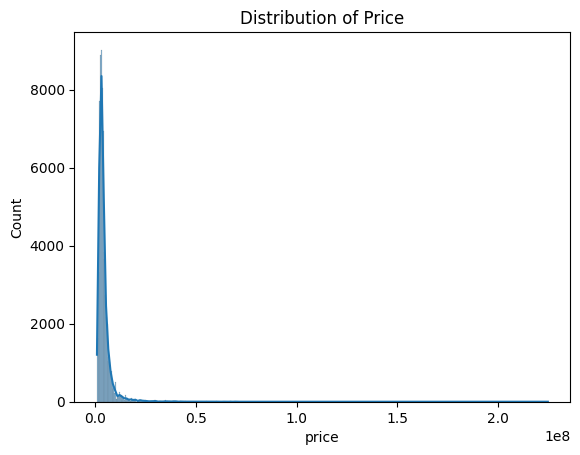

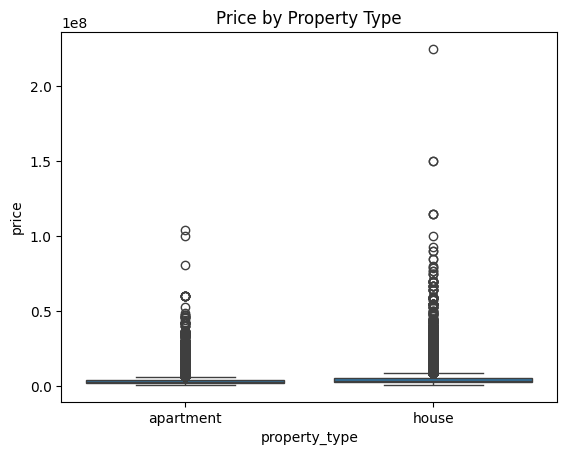

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric example
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Boxplot example
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Price by Property Type')
plt.show()


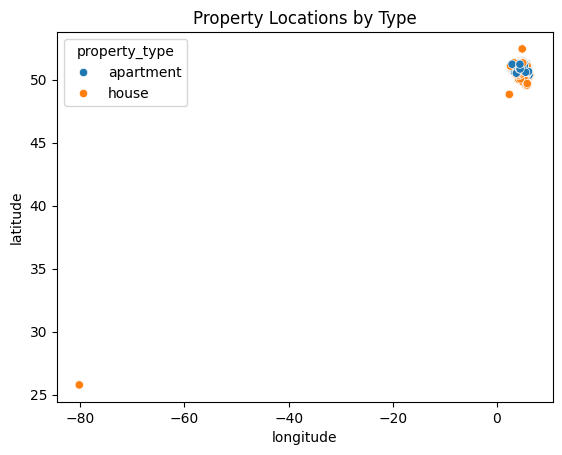

In [ ]:
sns.scatterplot(x='longitude', y='latitude', hue='property_type', data=df)
plt.title('Property Locations by Type')
plt.show()


In [ ]:
# Filter properties outside Belgium bounds
outside_belgium = df[
    (df['latitude'] < 49.5) | (df['latitude'] > 51.5) |
    (df['longitude'] < 2.5) | (df['longitude'] > 6.5)
]

print(f"Number of properties outside Belgium: {len(outside_belgium)}")
display(outside_belgium[['id', 'property_type', 'latitude', 'longitude', 'zip_code']])



Number of properties outside Belgium: 9


,id,property_type,latitude,longitude,zip_code
11625,39071000,house,25.761680,-80.191790,3270
11964,78182000,house,52.433856,4.850932,3650
20417,31272000,house,52.434244,4.850995,3650
31653,47038000,house,48.824985,2.372534,1200
42356,15379000,house,48.824985,2.372534,1200
46786,15200000,house,51.501040,4.777602,2328
61295,66783000,house,25.761680,-80.191790,3270
61985,8864000,apartment,51.501127,4.777267,2328
63280,79136000,house,52.433899,4.850987,3650


In [ ]:
# IDs
ids_to_check = ['39071000', '66783000']  # replace with your IDs as strings

# Ensure the ID column is string and strip spaces
df['id'] = df['id'].astype(str).str.strip()

# Convert ids_to_check to strings as well
ids_to_check = [str(i).strip() for i in ids_to_check]

# Filter the rows
rows = df[df['id'].isin(ids_to_check)]

# Display all columns for these rows
display(rows)

# Filter rows by ID
rows = df[df['id'].isin(ids_to_check)]

# Display all columns for these rows
display(rows)


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
11625,39071000,2650000,house,HOUSE,Flanders,Flemish Brabant,Leuven,3270,25.761680,-80.191790,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,5
34961,66783000,2990000,house,HOUSE,Flanders,Antwerp,Antwerp,2180,51.280982,4.444728,...,0,0,0,NaN,NaN,E,GAS,1,NaN,4
61295,66783000,2650000,house,HOUSE,Flanders,Flemish Brabant,Leuven,3270,25.761680,-80.191790,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,6
73845,66783000,4990000,apartment,APARTMENT,Brussels-Capital,Brussels,Brussels,1050,NaN,NaN,...,0,0,1,NaN,259.0,E,NaN,1,NaN,7


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
11625,39071000,2650000,house,HOUSE,Flanders,Flemish Brabant,Leuven,3270,25.761680,-80.191790,...,0,0,0,GOOD,NaN,NaN,NaN,0,NaN,5
34961,66783000,2990000,house,HOUSE,Flanders,Antwerp,Antwerp,2180,51.280982,4.444728,...,0,0,0,NaN,NaN,E,GAS,1,NaN,4
61295,66783000,2650000,house,HOUSE,Flanders,Flemish Brabant,Leuven,3270,25.761680,-80.191790,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,6
73845,66783000,4990000,apartment,APARTMENT,Brussels-Capital,Brussels,Brussels,1050,NaN,NaN,...,0,0,1,NaN,259.0,E,NaN,1,NaN,7


Longitude for Leuven is ~approximately 4.70093° E

In [ ]:
# Ensure numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation with primary_energy_consumption_sqm
correlations = df[numeric_cols].corr()['fl_double_glazing'].sort_values(ascending=False)

# Show results
print(correlations)


fl_double_glazing                 1.000000
construction_year                 0.159374
fl_open_fire                      0.139095
fl_terrace                        0.108717
fl_garden                         0.102082
nbr_frontages                     0.093574
longitude                         0.070344
terrace_sqm                       0.038749
nbr_bedrooms                      0.019929
total_area_sqm                    0.017945
garden_sqm                        0.007276
price                             0.002770
primary_energy_consumption_sqm   -0.001429
surface_land_sqm                 -0.002412
cadastral_income                 -0.012320
latitude                         -0.016333
zip_code                         -0.037940
fl_floodzone                     -0.181806
missing_count                    -0.254273
fl_furnished                           NaN
fl_swimming_pool                       NaN
Name: fl_double_glazing, dtype: float64


,price,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,fl_furnished,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income,missing_count
price,1.00,-0.04,0.17,-0.09,0.09,0.19,0.15,0.10,0.35,NaN,...,0.03,0.09,0.03,0.09,NaN,-0.06,-0.00,0.00,0.00,0.01
zip_code,-0.04,1.00,0.01,-0.49,-0.05,-0.02,-0.00,-0.13,0.00,NaN,...,-0.13,-0.05,-0.08,-0.01,NaN,-0.07,0.00,-0.04,0.00,0.05
latitude,0.17,0.01,1.00,-0.14,0.18,-0.04,-0.02,-0.13,-0.08,NaN,...,-0.02,-0.03,-0.09,-0.03,NaN,-0.25,0.01,-0.02,-0.01,0.14
longitude,-0.09,-0.49,-0.14,1.00,-0.06,0.06,0.01,0.16,0.07,NaN,...,0.08,0.05,0.13,0.03,NaN,0.15,-0.01,0.07,0.00,-0.12
construction_year,0.09,-0.05,0.18,-0.06,1.00,0.01,0.00,0.11,0.01,NaN,...,0.12,0.04,0.08,0.01,NaN,-0.29,-0.00,0.16,0.00,-0.19
total_area_sqm,0.19,-0.02,-0.04,0.06,0.01,1.00,0.07,0.08,0.19,NaN,...,0.00,0.03,0.04,0.04,NaN,-0.00,0.00,0.02,0.00,-0.05
surface_land_sqm,0.15,-0.00,-0.02,0.01,0.00,0.07,1.00,0.06,0.07,NaN,...,-0.00,0.02,-0.00,0.17,NaN,0.01,-0.00,-0.00,0.00,-0.00
nbr_frontages,0.10,-0.13,-0.13,0.16,0.11,0.08,0.06,1.00,0.20,NaN,...,0.10,0.06,0.23,0.08,NaN,-0.04,-0.00,0.09,-0.01,-0.31
nbr_bedrooms,0.35,0.00,-0.08,0.07,0.01,0.19,0.07,0.20,1.00,NaN,...,-0.03,0.04,0.14,0.07,NaN,-0.01,0.00,0.02,0.00,-0.18
fl_furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


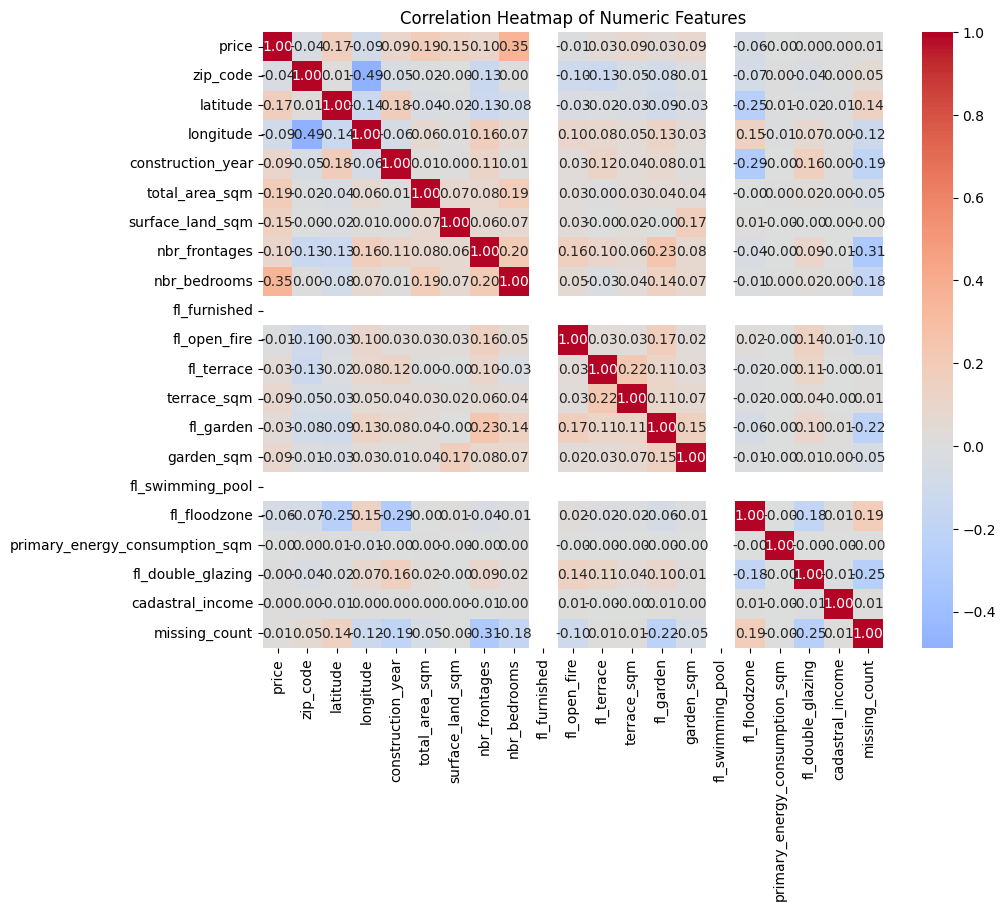

In [ ]:
import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Round for readability
corr_matrix_rounded = corr_matrix.round(2)

# Display as table
display(corr_matrix_rounded)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


,price,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income,missing_count
price,1.00,0.09,0.19,0.15,0.10,0.35,-0.01,0.03,0.09,0.03,0.09,-0.06,-0.0,0.00,0.00,0.01
construction_year,0.09,1.00,0.01,0.00,0.11,0.01,0.03,0.12,0.04,0.08,0.01,-0.29,-0.0,0.16,0.00,-0.19
total_area_sqm,0.19,0.01,1.00,0.07,0.08,0.19,0.03,0.00,0.03,0.04,0.04,-0.00,0.0,0.02,0.00,-0.05
surface_land_sqm,0.15,0.00,0.07,1.00,0.06,0.07,0.03,-0.00,0.02,-0.00,0.17,0.01,-0.0,-0.00,0.00,-0.00
nbr_frontages,0.10,0.11,0.08,0.06,1.00,0.20,0.16,0.10,0.06,0.23,0.08,-0.04,-0.0,0.09,-0.01,-0.31
nbr_bedrooms,0.35,0.01,0.19,0.07,0.20,1.00,0.05,-0.03,0.04,0.14,0.07,-0.01,0.0,0.02,0.00,-0.18
fl_open_fire,-0.01,0.03,0.03,0.03,0.16,0.05,1.00,0.03,0.03,0.17,0.02,0.02,-0.0,0.14,0.01,-0.10
fl_terrace,0.03,0.12,0.00,-0.00,0.10,-0.03,0.03,1.00,0.22,0.11,0.03,-0.02,-0.0,0.11,-0.00,0.01
terrace_sqm,0.09,0.04,0.03,0.02,0.06,0.04,0.03,0.22,1.00,0.11,0.07,-0.02,-0.0,0.04,-0.00,0.01
fl_garden,0.03,0.08,0.04,-0.00,0.23,0.14,0.17,0.11,0.11,1.00,0.15,-0.06,-0.0,0.10,0.01,-0.22


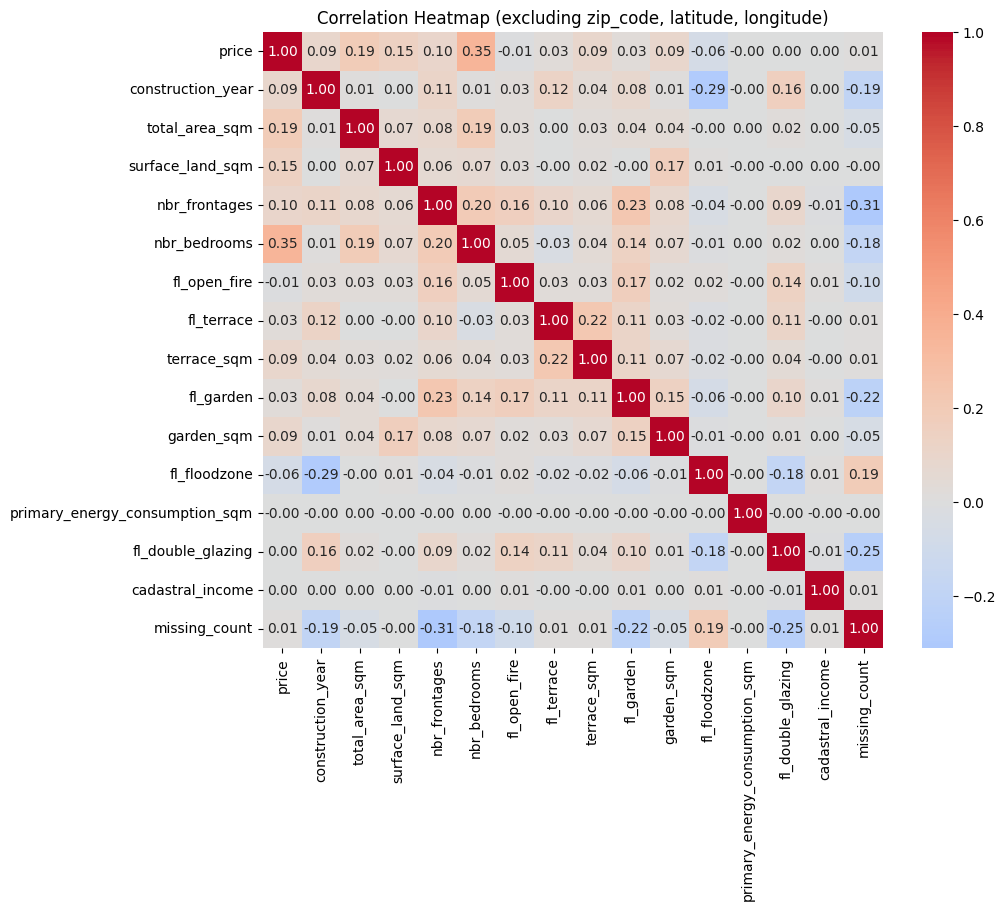

In [ ]:
# Keep only columns with more than 1 unique value
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if df[col].nunique() > 1 and col not in ['zip_code', 'latitude', 'longitude']]

corr_matrix = df[numeric_cols].corr().round(2)
display(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (excluding zip_code, latitude, longitude)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Select numeric columns (excluding location columns)
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in ['zip_code', 'latitude', 'longitude', 'missing_count']]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Flatten the matrix, keep only one triangle (no duplicates)
corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation descending
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values('abs_corr', ascending=False).drop(columns='abs_corr')

# Display
display(corr_pairs_sorted)


,Feature 1,Feature 2,Correlation
4,price,nbr_bedrooms,0.352456
23,construction_year,fl_floodzone,-0.286847
54,nbr_frontages,fl_garden,0.233936
77,fl_terrace,terrace_sqm,0.224395
50,nbr_frontages,nbr_bedrooms,0.200351
...,...,...,...
42,surface_land_sqm,fl_terrace,-0.000686
47,surface_land_sqm,primary_energy_consumption_sqm,-0.000532
103,primary_energy_consumption_sqm,cadastral_income,-0.000241
96,garden_sqm,primary_energy_consumption_sqm,-0.000228


heating_type
GAS         31871
NaN         31441
FUELOIL      7711
ELECTRIC     3621
PELLET        499
WOOD          147
SOLAR         134
CARBON         80
Name: count, dtype: int64

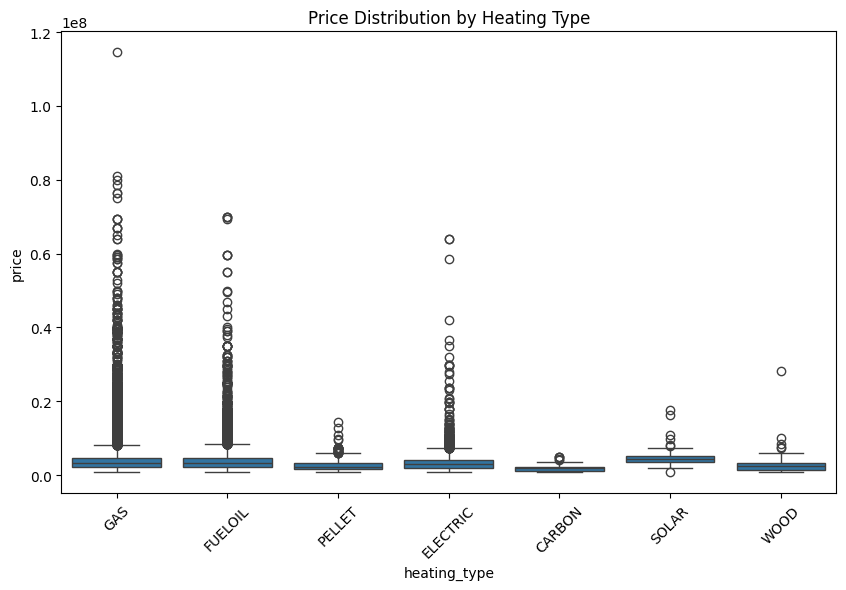

price                   total_area_sqm        nbr_bedrooms  \
                   mean     median  count           mean median         mean   
heating_type                                                                   
CARBON        1987937.4  1995000.0     80          128.0  105.0          2.4   
ELECTRIC      3559096.7  2940000.0   3621          115.7   97.0          2.4   
FUELOIL       4281676.1  3250000.0   7711          209.1  171.0          3.6   
GAS           4262103.5  3190000.0  31871          147.0  120.0          2.8   
PELLET        2720002.5  2350000.0    499          150.2  132.0          2.9   
SOLAR         4762168.4  4370000.0    134          137.9  128.0          2.7   
WOOD          2835619.0  2450000.0    147          156.7  137.0          3.0   

                    primary_energy_consumption_sqm         
             median                           mean median  
heating_type                                               
CARBON          2.0                          740.1  744.0  
ELECTRIC        2.0                         8257.2  328.0  
FUELOIL         3.0                         1087.2  371.0  
GAS             3.0                         1183.6  223.0  
PELLET          3.0                          442.8  356.5  
SOLAR           3.0                           47.0   30.0  
WOOD            3.0                          601.5  541.0

In [ ]:
# Count of each heating type
heating_counts = df['heating_type'].value_counts(dropna=False)
display(heating_counts)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='heating_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Heating Type')
plt.show()

summary_heating = df.groupby('heating_type').agg({
    'price': ['mean', 'median', 'count'],
    'total_area_sqm': ['mean', 'median'],
    'nbr_bedrooms': ['mean', 'median'],
    'primary_energy_consumption_sqm': ['mean', 'median']
}).round(1)

display(summary_heating)


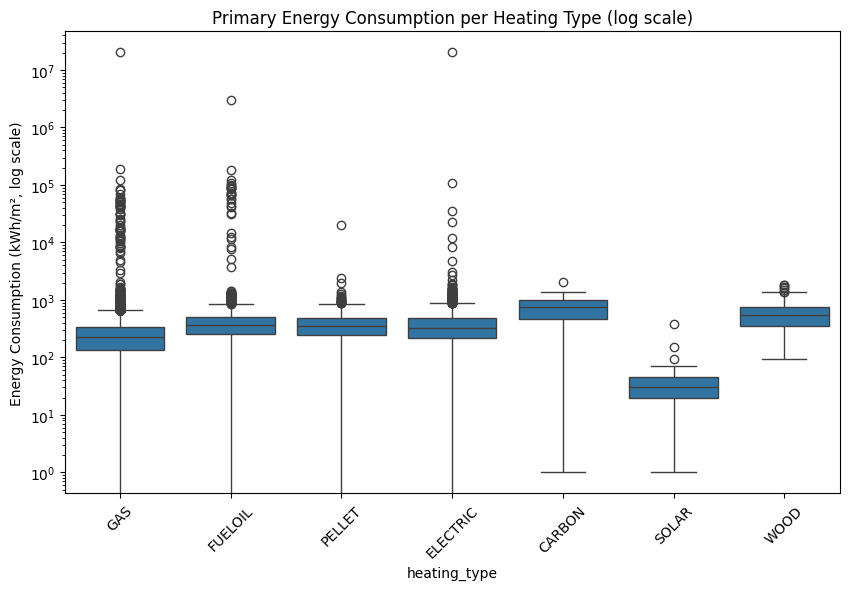

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='heating_type', y='primary_energy_consumption_sqm', data=df)
plt.yscale('log')  # use log scale to compress extreme values
plt.xticks(rotation=45)
plt.title('Primary Energy Consumption per Heating Type (log scale)')
plt.ylabel('Energy Consumption (kWh/m², log scale)')
plt.show()



In [10]:
import pandas as pd

# Load the data
file_path = '../data/raw/immoweb_data.csv'
df = pd.read_csv(file_path, sep=';', dtype={"id": str}, low_memory=False)

# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Collect all outlier row indices across all numeric columns
all_outliers_idx = set()

for col in numeric_cols:
    print(col)
    print(df[col].describe())


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # outlier_idx = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].index
    outlier_idx = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)].index

    all_outliers_idx.update(outlier_idx)
    print(f"{col}: {len(outlier_idx)} outliers")

# Convert set to list before using .loc
all_outliers = df.loc[list(all_outliers_idx)]

print(f"\nTotal outlier rows across all numeric columns: {len(all_outliers)}")
display(all_outliers.head())

# Save combined outliers to CSV
all_outliers.to_csv('../data/raw/outliers.csv', index=False)
print("Saved outliers to ../data/raw/outliers.csv")



Total outlier rows across all numeric columns: 0


,"id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income"


Saved outliers to ../data/raw/outliers.csv
